# US Election 2012 Donation Data Set

The questions we will be trying to answer while looking at this Data Set is:

1. How much was donated and what was the average donation?
2. How did the donations differ between candidates?
3. How did the donations differ between Democrats and Republicans?
4. Find some interesting facts about the donors.

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
plt.style.use("ggplot")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

from __future__ import division

import requests
from io import StringIO

In [2]:
# Set the DataFrame as the csv file
donor_df = pd.read_csv('Election_Donor_Data.csv')

In [3]:
#Let's explore a little

In [4]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [5]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [6]:
candidates = donor_df.cand_nm.unique()
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [7]:
donor_df['contb_receipt_amt'].value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
             ...  
 386.10          1
-113.40          1
 1385.00         1
 43.98           1
 2408.79         1
Name: contb_receipt_amt, Length: 8079, dtype: int64

In [8]:
donor_df['contb_receipt_amt'].sort_values()

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
             ...    
319478     526246.17
344419    1511192.17
344539    1679114.65
326651    1944042.43
325136    2014490.51
Name: contb_receipt_amt, Length: 1001731, dtype: float64

In [9]:
pd.options.display.float_format = '{:.2f}'.format

In [10]:
donor_df['contb_receipt_amt'].describe()

count   1001731.00
mean        298.24
std        3749.67
min      -30800.00
25%          35.00
50%         100.00
75%         250.00
max     2014490.51
Name: contb_receipt_amt, dtype: float64

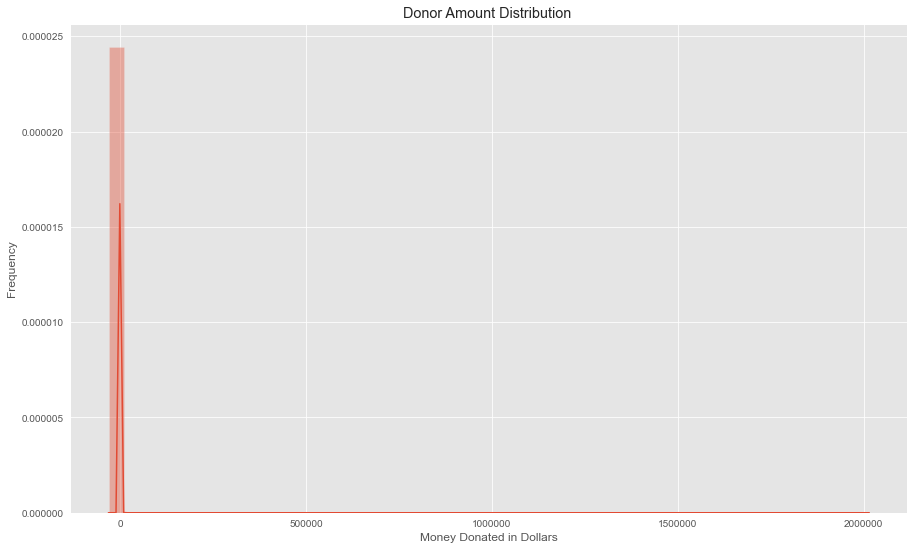

In [11]:
plt.figure(figsize=(15,9))
sns.distplot(donor_df["contb_receipt_amt"])
plt.title("Donor Amount Distribution ")
plt.xlabel("Money Donated in Dollars")
plt.ylabel("Frequency")
plt.ticklabel_format(style='plain')
plt.show()

Looks like we have some negative values, as well as some huge donation amounts! let's go ahead and only look at the positive contribution amounts and get rid of negative values.

In [12]:
top_donor = donor_df['contb_receipt_amt'].copy()

In [13]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.00,RETIRED,RETIRED,250.00,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.00,RETIRED,RETIRED,50.00,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.00,INFORMATION REQUESTED,INFORMATION REQUESTED,250.00,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.00,NONE,RETIRED,250.00,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.00,NONE,RETIRED,300.00,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [14]:
# Get rid of the negative values
top_donor = top_donor[top_donor >0]

top_donor.sort_values()

top_donor.value_counts().head(10)

100.00     178188
50.00      137584
25.00      110345
250.00      91182
500.00      57984
2500.00     49005
35.00       37237
1000.00     36494
10.00       33986
200.00      27813
Name: contb_receipt_amt, dtype: int64

Here we can see that the top 10 most common donations ranged from 10 to 2500 dollars.

<AxesSubplot:>

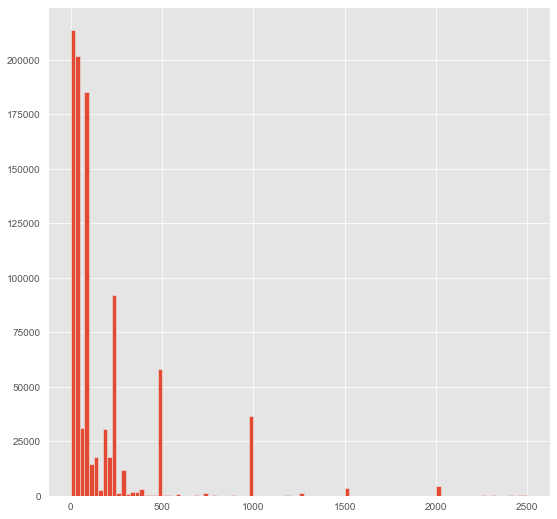

In [15]:
# Let's create a Series of the common donations limited to 2500
com_don = top_donor[top_donor < 2500]

# Set a high number of bins to account for the non-round donations and check histogram for spikes.
com_don.hist(bins=100, figsize=(9,9))

In [16]:
donor_df.cand_nm.unique()

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

Let's find the corressponding parties of the above candidates from the internet

In [17]:
# Dictionary of party affiliation
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

# Now map the party with candidate
donor_df['Party'] = donor_df.cand_nm.map(party_map)

In [18]:
donor_df = donor_df[donor_df.contb_receipt_amt >0]

In [19]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.00,RETIRED,RETIRED,250.00,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.00,RETIRED,RETIRED,50.00,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.00,INFORMATION REQUESTED,INFORMATION REQUESTED,250.00,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.00,NONE,RETIRED,250.00,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.00,NONE,RETIRED,300.00,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


Let's start by aggregating the data by candidate. We'll take a quick look a the total amounts received by each candidate. So, we will look a the total number of donations first, and then at the total amount.

In [20]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

Obama received the most number of donations. This makes sense since he was the only candidate from the democrats.

In [21]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                 2711439.29
Cain, Herman                       7101081.89
Gingrich, Newt                    12832769.69
Huntsman, Jon                      3330373.48
Johnson, Gary Earl                  566961.60
McCotter, Thaddeus G                 39030.00
Obama, Barack                    135877427.24
Paul, Ron                         21009619.83
Pawlenty, Timothy                  6004819.48
Perry, Rick                       20305754.00
Roemer, Charles E. 'Buddy' III      373009.90
Romney, Mitt                      88335907.53
Santorum, Rick                    11043159.31
Name: contb_receipt_amt, dtype: float64

In [22]:
donation_received= donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

In [23]:
donation_received.sort_values()

cand_nm
McCotter, Thaddeus G                 39030.00
Roemer, Charles E. 'Buddy' III      373009.90
Johnson, Gary Earl                  566961.60
Bachmann, Michelle                 2711439.29
Huntsman, Jon                      3330373.48
Pawlenty, Timothy                  6004819.48
Cain, Herman                       7101081.89
Santorum, Rick                    11043159.31
Gingrich, Newt                    12832769.69
Perry, Rick                       20305754.00
Paul, Ron                         21009619.83
Romney, Mitt                      88335907.53
Obama, Barack                    135877427.24
Name: contb_receipt_amt, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Obama, Barack'),
  Text(0, 1, 'Romney, Mitt'),
  Text(0, 2, 'Paul, Ron'),
  Text(0, 3, 'Perry, Rick'),
  Text(0, 4, 'Gingrich, Newt'),
  Text(0, 5, 'Santorum, Rick'),
  Text(0, 6, 'Cain, Herman'),
  Text(0, 7, 'Pawlenty, Timothy'),
  Text(0, 8, 'Huntsman, Jon'),
  Text(0, 9, 'Bachmann, Michelle'),
  Text(0, 10, 'Johnson, Gary Earl'),
  Text(0, 11, "Roemer, Charles E. 'Buddy' III"),
  Text(0, 12, 'McCotter, Thaddeus G')])

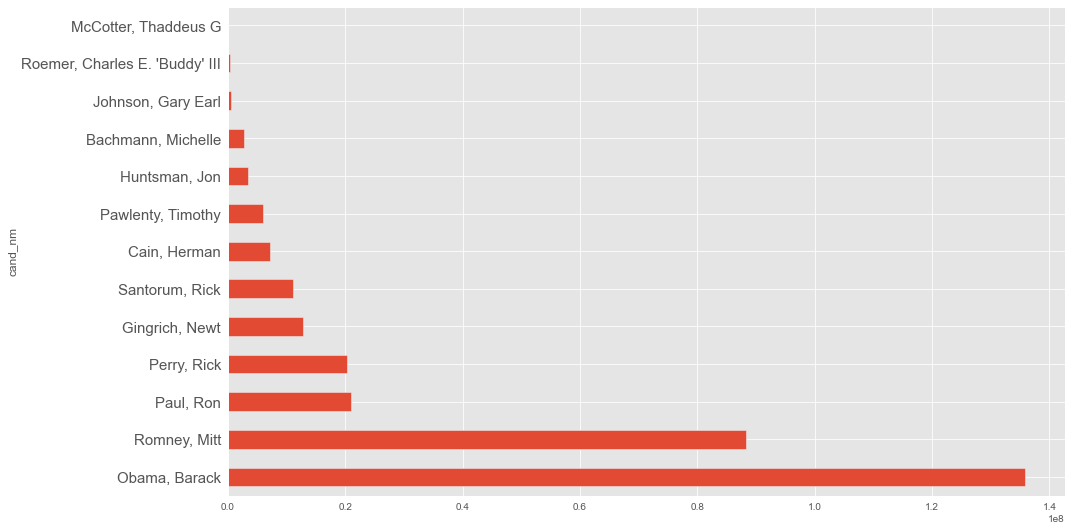

In [24]:
plt.figure(figsize=(15,9))
donation_received.sort_values(ascending= False).plot(kind='barh')
plt.yticks (fontsize=15)

### No suprise about the top 2 candidates.

### Let's compare Democrats vs Republicans (More like 1 vs all).

In [25]:
donor_df.groupby('Party')['contb_receipt_amt'].sum()

Party
Democrat     135877427.24
Republican   173653926.00
Name: contb_receipt_amt, dtype: float64

<AxesSubplot:xlabel='Party'>

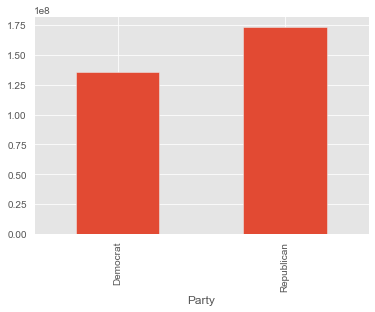

In [26]:
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')

Let's find about donors' occupation to see if there is anything interesting to learn

In [27]:
occupation_df = donor_df.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='Party', aggfunc='sum')

In [28]:
occupation_df

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.00,NaN
AREA VICE PRESIDENT,250.00,NaN
RESEARCH ASSOCIATE,100.00,NaN
TEACHER,500.00,NaN
THERAPIST,3900.00,NaN
...,...,...
ZOOKEEPER,35.00,NaN
ZOOLOGIST,400.00,NaN
ZOOLOGY EDUCATION,25.00,NaN


There are too many categories of occupation to display effectively with a small, static visualization. We have to filter the data.

In [29]:
 #let's set our cut off at 1 million dollars.

In [30]:
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]

In [31]:
occupation_df.head(3)

Party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7477194.43
BANKER,224084.40,1259468.73
BUSINESS OWNER,449979.30,1323342.43


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'ATTORNEY'),
  Text(0, 1, 'BANKER'),
  Text(0, 2, 'BUSINESS OWNER'),
  Text(0, 3, 'C.E.O.'),
  Text(0, 4, 'CEO'),
  Text(0, 5, 'CHAIRMAN'),
  Text(0, 6, 'CONSULTANT'),
  Text(0, 7, 'ENGINEER'),
  Text(0, 8, 'EXECUTIVE'),
  Text(0, 9, 'FINANCE'),
  Text(0, 10, 'HOMEMAKER'),
  Text(0, 11, 'INFORMATION REQUESTED'),
  Text(0, 12, 'INFORMATION REQUESTED PER BEST EFFORTS'),
  Text(0, 13, 'INVESTMENTS'),
  Text(0, 14, 'INVESTOR'),
  Text(0, 15, 'LAWYER'),
  Text(0, 16, 'MANAGER'),
  Text(0, 17, 'NOT EMPLOYED'),
  Text(0, 18, 'OWNER'),
  Text(0, 19, 'PARTNER'),
  Text(0, 20, 'PHYSICIAN'),
  Text(0, 21, 'PRESIDENT'),
  Text(0, 22, 'PROFESSOR'),
  Text(0, 23, 'REAL ESTATE'),
  Text(0, 24, 'RETIRED'),
  Text(0, 25, 'SALES'),
  Text(0, 26, 'SELF-EMPLOYED'),
  Text(0, 27, 'STUDENT'),
  Text(0, 28, 'TEACHER'),
  Text(0, 29, 'VICE PRESIDENT'),
  Te

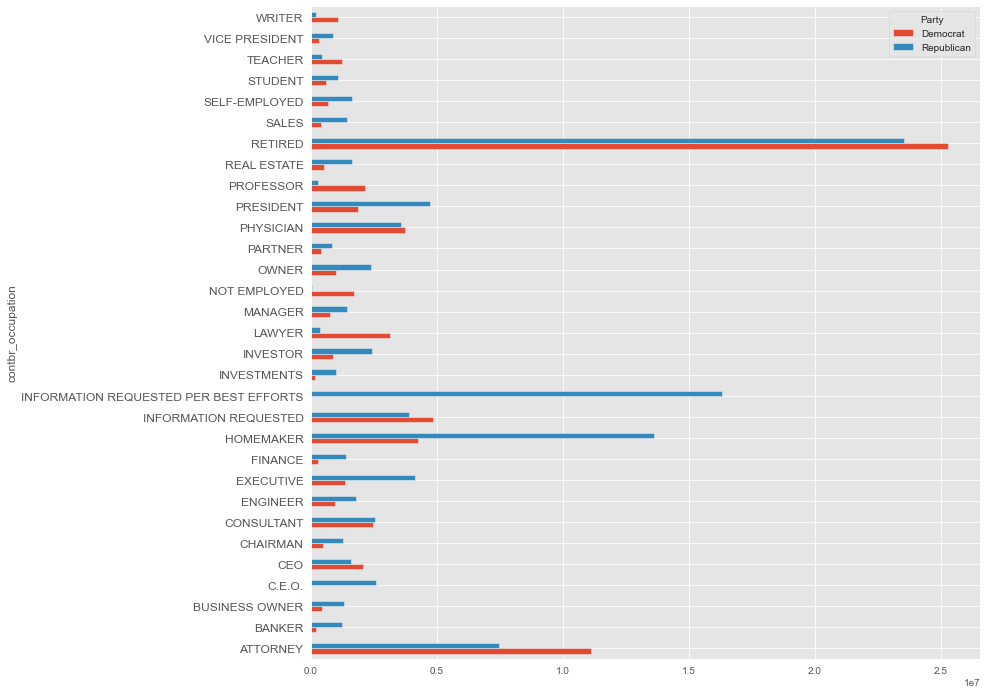

In [32]:
occupation_df.plot(kind='barh',figsize=(12,12))
plt.yticks(fontsize=12)

In [33]:
# Let's change the colour bars because blue pill is for the Democrats

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'ATTORNEY'),
  Text(0, 1, 'BANKER'),
  Text(0, 2, 'BUSINESS OWNER'),
  Text(0, 3, 'C.E.O.'),
  Text(0, 4, 'CEO'),
  Text(0, 5, 'CHAIRMAN'),
  Text(0, 6, 'CONSULTANT'),
  Text(0, 7, 'ENGINEER'),
  Text(0, 8, 'EXECUTIVE'),
  Text(0, 9, 'FINANCE'),
  Text(0, 10, 'HOMEMAKER'),
  Text(0, 11, 'INFORMATION REQUESTED'),
  Text(0, 12, 'INFORMATION REQUESTED PER BEST EFFORTS'),
  Text(0, 13, 'INVESTMENTS'),
  Text(0, 14, 'INVESTOR'),
  Text(0, 15, 'LAWYER'),
  Text(0, 16, 'MANAGER'),
  Text(0, 17, 'NOT EMPLOYED'),
  Text(0, 18, 'OWNER'),
  Text(0, 19, 'PARTNER'),
  Text(0, 20, 'PHYSICIAN'),
  Text(0, 21, 'PRESIDENT'),
  Text(0, 22, 'PROFESSOR'),
  Text(0, 23, 'REAL ESTATE'),
  Text(0, 24, 'RETIRED'),
  Text(0, 25, 'SALES'),
  Text(0, 26, 'SELF-EMPLOYED'),
  Text(0, 27, 'STUDENT'),
  Text(0, 28, 'TEACHER'),
  Text(0, 29, 'VICE PRESIDENT'),
  Te

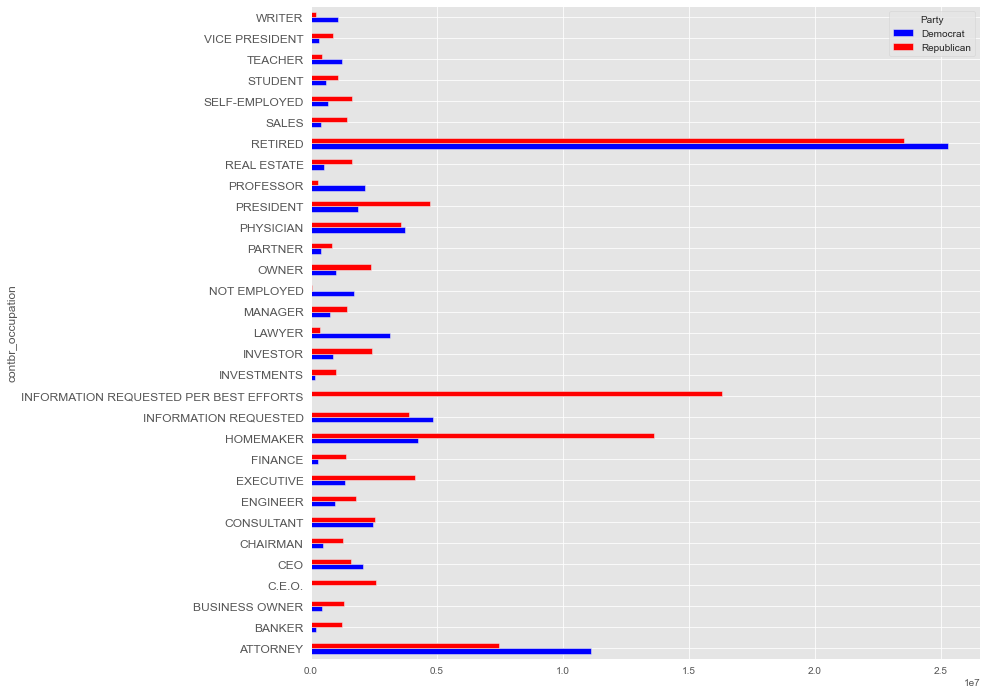

In [34]:
occupation_df.plot(kind='barh',figsize=(12,12),cmap='bwr')
plt.yticks(fontsize=12)

Looks like there are some occupations that are either mislabeled or aren't really occupations. Let's get rid of: Information Requested occupations and let's combine CEO and C.E.O.

In [35]:
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'],axis=0,inplace=True)

In [36]:
# Now let's combine the CEO and C.E.O rows.

In [37]:
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']

In [38]:
occupation_df.drop('C.E.O.',inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, 'ATTORNEY'),
  Text(0, 1, 'BANKER'),
  Text(0, 2, 'BUSINESS OWNER'),
  Text(0, 3, 'CEO'),
  Text(0, 4, 'CHAIRMAN'),
  Text(0, 5, 'CONSULTANT'),
  Text(0, 6, 'ENGINEER'),
  Text(0, 7, 'EXECUTIVE'),
  Text(0, 8, 'FINANCE'),
  Text(0, 9, 'HOMEMAKER'),
  Text(0, 10, 'INVESTMENTS'),
  Text(0, 11, 'INVESTOR'),
  Text(0, 12, 'LAWYER'),
  Text(0, 13, 'MANAGER'),
  Text(0, 14, 'NOT EMPLOYED'),
  Text(0, 15, 'OWNER'),
  Text(0, 16, 'PARTNER'),
  Text(0, 17, 'PHYSICIAN'),
  Text(0, 18, 'PRESIDENT'),
  Text(0, 19, 'PROFESSOR'),
  Text(0, 20, 'REAL ESTATE'),
  Text(0, 21, 'RETIRED'),
  Text(0, 22, 'SALES'),
  Text(0, 23, 'SELF-EMPLOYED'),
  Text(0, 24, 'STUDENT'),
  Text(0, 25, 'TEACHER'),
  Text(0, 26, 'VICE PRESIDENT'),
  Text(0, 27, 'WRITER')])

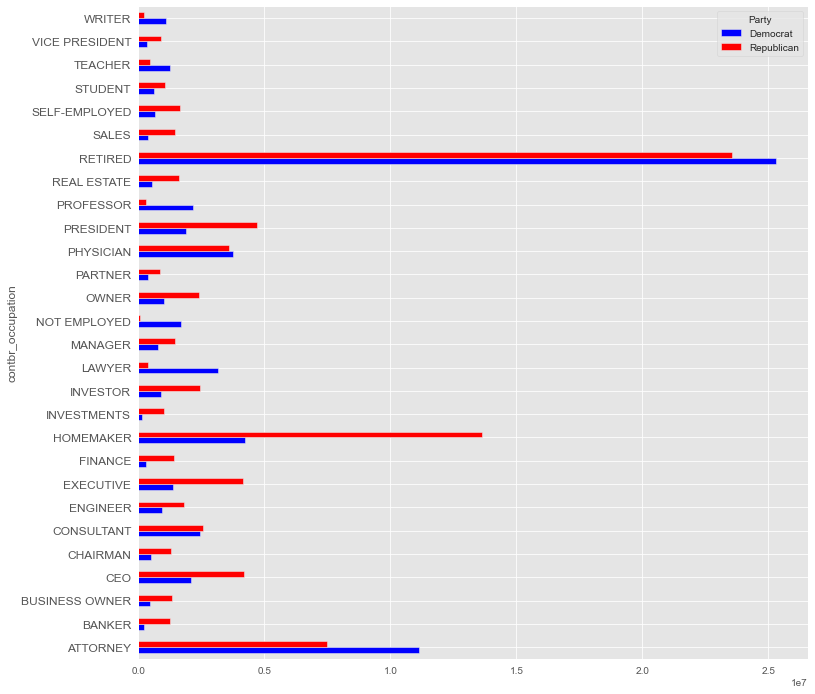

In [39]:
occupation_df.plot(kind='barh',figsize=(12,12),cmap='bwr')
plt.yticks(fontsize=12)

i. It seems that most of the CEOs are republicans. This makes sense because democrats always say "Tax the rich" 



ii. Retired people donated the most amount of money.

iii. Most of the teachers, professors, writers, lawyers, and attorneys are democrats

# More Analysis of this dataset coming soon!!!